**EXPERIMENT TO SHOW THAT ANYLOSS PERFORM BETTER THAN SAMPLING TECHNIQUES LIKE SMOTE, RANDOM UNDERSAMPLING**

In [2]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import metrics

def pca(df_X, df_y):
    pca = PCA(n_components = 2)
    pca.fit(df_X)
    df_pca = pca.transform(df_X)
    df_pca = pd.DataFrame(df_pca, columns = ['comp. 0', 'comp. 1'])
    df_pca['target'] = df_y
    print('variance ratio:', pca.explained_variance_ratio_, 'sum:', sum(pca.explained_variance_ratio_))
    return df_pca

def concat(df_X, df_y):
    df = pd.concat([df_X, df_y], axis=1)
    return df

def concath(df_X, df_y):
    df = pd.concat([df_X, df_y])
    return df

#ADALINE
def linear(X,theta):
    z = np.dot(X,theta.T)
    return z

def cost_ada(z,y):
    loss = ((y-z)**2).sum()
    return loss/2.0

def gd_ada(X,z,y):
    return -np.dot((y-z), X)

def cost_ada2(z,y):
    loss = ((y-z)**2).sum()
    return loss/len(y)

def gd_ada2(X,z,y):
    return -np.dot((y-z), X)/len(y)

def update_loss(theta,learning_rate,gradient):
    return theta-(learning_rate*gradient)

def predict_ada(X,theta):
    outcome = []
    result = linear(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= 0:
            outcome.append(-1)
        else:
            outcome.append(1)
    return outcome

def plot_cost_function(cost):
    plt.plot(cost,label="loss")
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()

#BCE & AnyLoss

def predict(X,theta):
    outcome = []
    result = sigmoid(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome

def predict_ours(X,theta):
    outcome = []
    result = sigmoid_2(sigmoid(X,theta))
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome

def sigmoid(X,theta):
    z = np.dot(X,theta.T).astype(float)
    return 1.0/(1+np.exp(-z))

def sigmoid_2(p):
    s = (L*(p-0.5)).astype(float)
    return 1.0/(1+np.exp(-s))

def cost_function(h,y):
    loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
    return loss

def gradient_descent(X,h,y,yl):
    return np.dot(X.T,(h-y))/yl

def cost_function_new(bs,syh,syhy,bs_sy):
    loss = (1+bs)*syhy / ( bs_sy + syh )  # f_score
    return 1-loss

def gradient_descent_new(p,X,yh,y,bs,syh,syhy,bs_sy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -( (1+bs) * (np.dot(y*yp_pz*(bs_sy+syh), X) - np.dot(yp_pz*syhy, X)) ) / ( (bs_sy + syh)**2 )

def cost_function_acc(sy,syh,syhy,yl):
    loss = (yl-sy-syh+2*syhy)/yl   # accuracy
    return 1-loss

def gradient_descent_acc(p,X,yh,y,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return (np.dot(yp_pz, X) - 2*np.dot(y*yp_pz, X)) / yl

def cost_function_pre(syh,syhy):
    loss = syhy/syh  # precision
    return 1-loss

def gradient_descent_pre(p,X,yh,y,syh,syhy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return (-np.dot(y*yp_pz, X)*syh + np.dot(yp_pz, X)*syhy) / (syh**2)

def cost_function_rec(sy,syhy):
    loss = syhy/sy  # recall
    return 1-loss

def gradient_descent_rec(p,X,yh,y,sy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -np.dot(y*yp_pz, X) / sy

def cost_function_gmean(sy,syh,syhy,yl):
    loss = (syhy*(yl-syh-sy+syhy)/(sy*(yl-sy)))**0.5  # gmean
    return 1-loss

def gradient_descent_gmean(p,X,yh,y,sy,syh,syhy,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    repeat1 = np.dot(y*yp_pz, X)
    repeat2 = yl-syh-sy+syhy
    return -2*( (repeat1*repeat2) + (-np.dot(yp_pz, X)+repeat1)*syhy ) / (sy*(yl-sy)*syhy*(repeat2))**0.5

def cost_function_balacc(sy,syh,syhy,yl):
    loss = (yl*(syhy+sy)-sy*(syh+sy)) / (2*sy*(yl-sy))     # balanced accuracy
    return 1-loss

def gradient_descent_balacc(p,X,yh,y,sy,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -(yl*np.dot(y*yp_pz, X)-sy*np.dot(yp_pz, X))/(2*sy*(yl-sy))

# **DIABETES PREDICTION**

In [4]:
diab_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Major-project-8th-sem/diabetes_prediction_dataset.csv')
diab_df.shape

(100000, 9)

In [5]:
diab_df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [6]:
diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
gen_encoded, gen_class = pd.factorize(diab_df['gender'])
print(gen_class)
gen_encoded

Index(['Female', 'Male', 'Other'], dtype='object')


array([0, 0, 1, ..., 1, 0, 0])

In [8]:
pd.Series(gen_encoded).value_counts()
diab_df['gender'] = gen_encoded
diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [9]:
smo_encoded, smo_class = pd.factorize(diab_df['smoking_history'])
print(smo_class)
smo_encoded
pd.Series(smo_encoded).value_counts()


Index(['never', 'No Info', 'current', 'former', 'ever', 'not current'], dtype='object')


,count
1,35816
0,35095
3,9352
2,9286
5,6447
4,4004


In [10]:
diab_df['smoking_history'] = smo_encoded
diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,1,27.32,6.2,90,0
99996,0,2.0,0,0,1,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [11]:
diab_df.iloc[:,:-1] = (diab_df.iloc[:,:-1] - diab_df.iloc[:,:-1].mean())/diab_df.iloc[:,:-1].std()
diab_df

<ipython-input-11-53cfd0685580>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       -0.841043
1       -0.841043
2        1.187228
3       -0.841043
4        1.187228
           ...   
99995   -0.841043
99996   -0.841043
99997    1.187228
99998   -0.841043
99999   -0.841043
Name: gender, Length: 100000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diab_df.iloc[:,:-1] = (diab_df.iloc[:,:-1] - diab_df.iloc[:,:-1].mean())/diab_df.iloc[:,:-1].std()
<ipython-input-11-53cfd0685580>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       -0.284438
1       -0.284438
2       -0.284438
3       -0.284438
4        3.515669
           ...   
99995   -0.284438
99996   -0.284438
99997   -0.284438
99998   -0.284438
99999   -0.284438
Name: hypertension, Length: 100000, dtype: float64' has dtype in

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,-0.841043,1.692695,-0.284438,4.936354,-0.898556,-0.321054,1.001701,0.047704,0
1,-0.841043,0.538004,-0.284438,-0.202577,-0.211035,-0.000116,1.001701,-1.426203,0
2,1.187228,-0.616688,-0.284438,-0.202577,-0.898556,-0.000116,0.161107,0.489876,0
3,-0.841043,-0.261398,-0.284438,-0.202577,0.476486,-0.583229,-0.492688,0.416181,0
4,1.187228,1.515050,3.515669,4.936354,0.476486,-1.081965,-0.679486,0.416181,0
...,...,...,...,...,...,...,...,...,...
99995,-0.841043,1.692695,-0.284438,-0.202577,-0.211035,-0.000116,0.628104,-1.180552,0
99996,-0.841043,-1.771379,-0.284438,-0.202577,-0.211035,-1.499336,0.908301,-0.934901,0
99997,1.187228,1.070938,-0.284438,-0.202577,1.164008,0.076729,0.161107,0.416181,0
99998,-0.841043,-0.794332,-0.284438,-0.202577,-0.898556,1.220355,-1.426681,-0.934901,0


In [12]:
diab_df['diabetes'].value_counts()
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

mse_acc = []
mse_f1 = []
mse_f5 = []
mse_f2 = []
mse_gmean = []
mse_bacc = []

bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

a = 0.1
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=a, random_state=0)
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=a, random_state=0)

82350 7650 90000
################################################## 1th CV ##################################################
82350 8235 90585


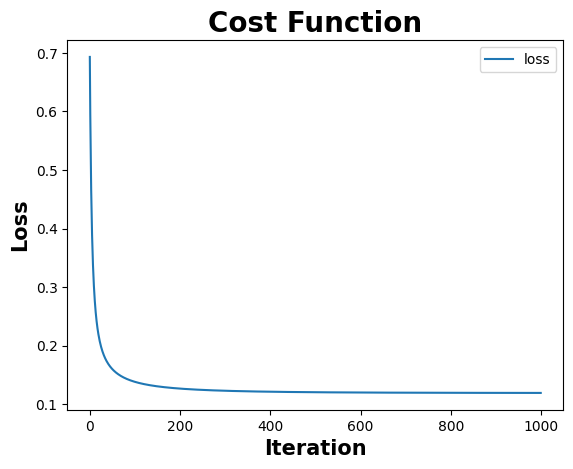

TN, FP, FN, TP: 81600 750 3070 5165
Accuracy = 0.9578296627476955
F1 = 0.7300353356890459
F0.5 = 0.809688038877567
F2 = 0.6646506241153005
Gmean = 0.7883455832364445
Balanced Accu. = 0.8090467516697025
Accuracy = 0.9594
F1 = 0.723055934515689
F0.5 = 0.79963789981895
F2 = 0.6598605577689243
Gmean = 0.7859191540782211
Balanced Accu. = 0.8070652523304404
82350 7650 90000
################################################## 2th CV ##################################################
82350 8235 90585


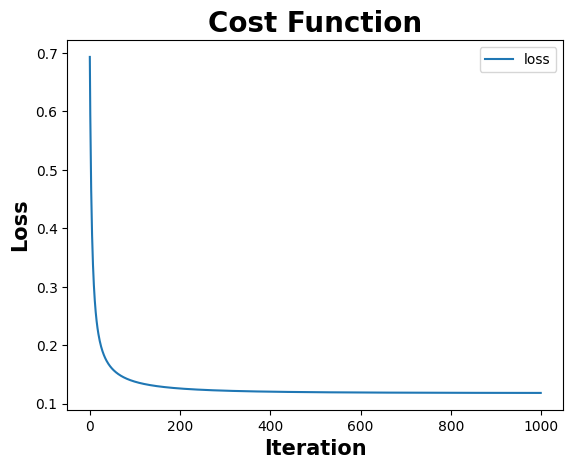

TN, FP, FN, TP: 81598 752 3048 5187
Accuracy = 0.9580504498537286
F1 = 0.7319034852546917
F0.5 = 0.8106967584633177
F2 = 0.6670696262763961
Gmean = 0.7900130722476012
Balanced Accu. = 0.8103703703703704
Accuracy = 0.9584
F1 = 0.7200538358008075
F0.5 = 0.7881555686505599
F2 = 0.6627849355797819
Gmean = 0.7889639785403801
Balanced Accu. = 0.809186756669881
82350 7650 90000
################################################## 3th CV ##################################################
82350 8235 90585


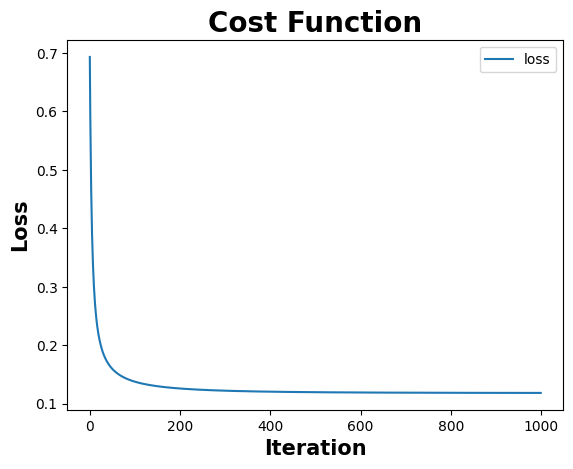

TN, FP, FN, TP: 81590 760 3047 5188
Accuracy = 0.957973174366617
F1 = 0.7315800606359727
F0.5 = 0.8099416117650733
F2 = 0.6670438181444147
Gmean = 0.7900504899934723
Balanced Accu. = 0.8103825136612022
Accuracy = 0.9587
F1 = 0.715368711233632
F0.5 = 0.7974800245851259
F2 = 0.6485878530367408
Gmean = 0.7778922142627521
Balanced Accu. = 0.8008132433301189
82350 7650 90000
################################################## 4th CV ##################################################
82350 8235 90585


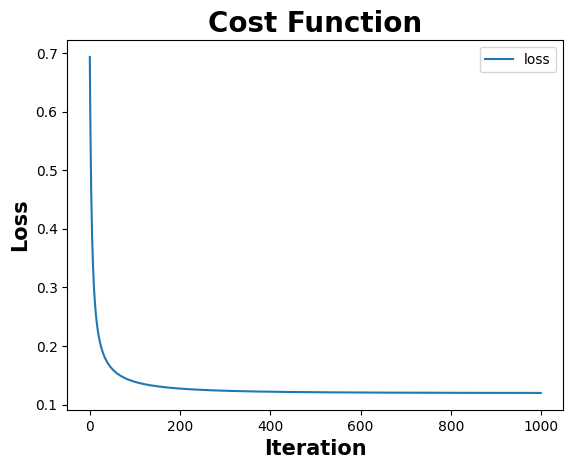

TN, FP, FN, TP: 81572 778 3073 5162
Accuracy = 0.9574874427333444
F1 = 0.7283245149911817
F0.5 = 0.8066885450851695
F2 = 0.6638374485596708
Gmean = 0.787981373918121
Balanced Accu. = 0.8086945962355798
Accuracy = 0.9621
F1 = 0.7398764584763212
F0.5 = 0.8221476510067114
F2 = 0.672572997254804
Gmean = 0.7933505396436134
Balanced Accu. = 0.8133429765348763
82350 7650 90000
################################################## 5th CV ##################################################
82350 8235 90585


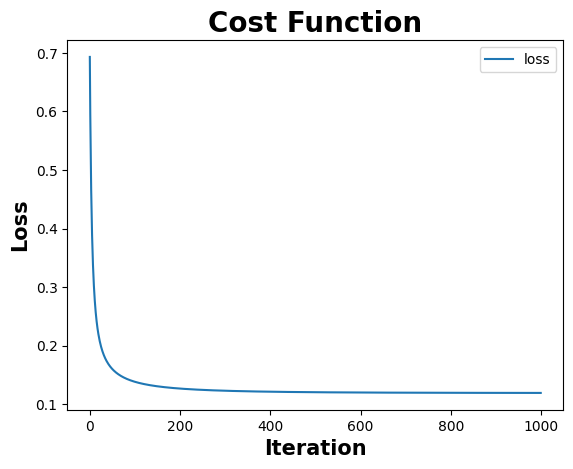

TN, FP, FN, TP: 81595 755 3063 5172
Accuracy = 0.9578517414582989
F1 = 0.7304053099844655
F0.5 = 0.8095670412923018
F2 = 0.6653459232768159
Gmean = 0.7888554457645478
Balanced Accu. = 0.8094414086217365
Accuracy = 0.9582
F1 = 0.7133058984910837
F0.5 = 0.7921998781230957
F2 = 0.6487025948103792
Gmean = 0.7783836246870631
Balanced Accu. = 0.8010736097717777
82350 7650 90000
################################################## 6th CV ##################################################
82350 8235 90585


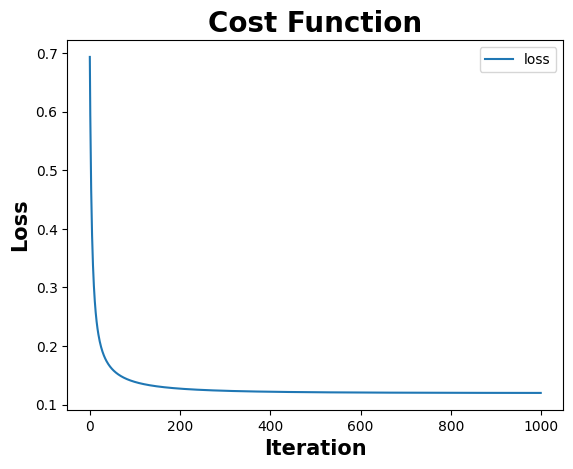

TN, FP, FN, TP: 81592 758 3099 5136
Accuracy = 0.9574212066015345
F1 = 0.7270153584825536
F0.5 = 0.8072679261890541
F2 = 0.661276201266931
Gmean = 0.7860907635551438
Balanced Accu. = 0.8072374013357619
Accuracy = 0.9618
F1 = 0.7460106382978723
F0.5 = 0.8092902481246395
F2 = 0.6919092254563394
Gmean = 0.8082646863983904
Balanced Accu. = 0.8249180327868852
82350 7650 90000
################################################## 7th CV ##################################################
82350 8235 90585


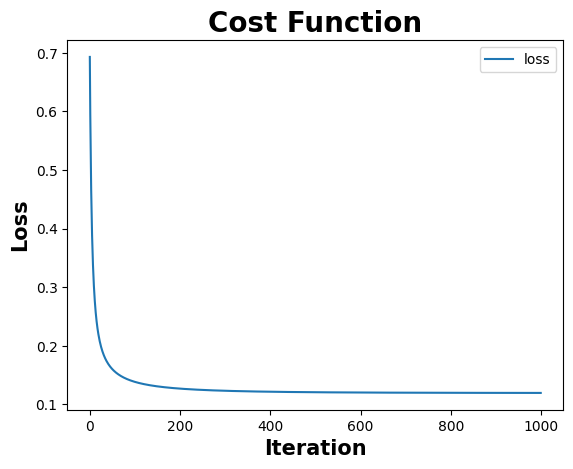

TN, FP, FN, TP: 81577 773 3075 5160
Accuracy = 0.9575205607992493
F1 = 0.7284020327498588
F0.5 = 0.807082303625614
F2 = 0.663699740179559
Gmean = 0.7878528535516119
Balanced Accu. = 0.8086035215543412
Accuracy = 0.9623
F1 = 0.7405368203716449
F0.5 = 0.8246474555487431
F2 = 0.6719960029977516
Gmean = 0.7927451501152055
Balanced Accu. = 0.8129186756669882
82350 7650 90000
################################################## 8th CV ##################################################
82350 8235 90585


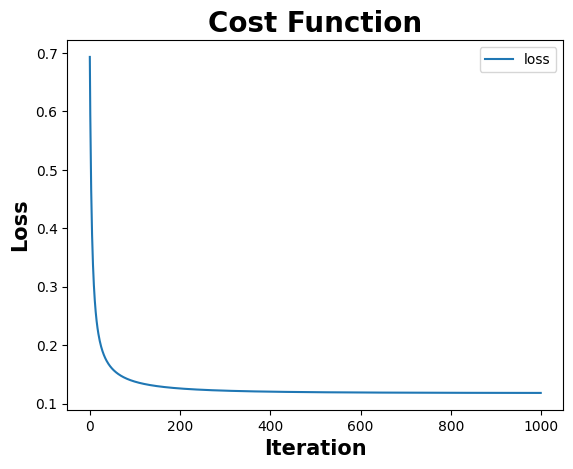

TN, FP, FN, TP: 81586 764 3045 5190
Accuracy = 0.9579510956560137
F1 = 0.7315526111776729
F0.5 = 0.8096471248946991
F2 = 0.6671980254023757
Gmean = 0.7901833892054666
Balanced Accu. = 0.8104796599878568
Accuracy = 0.959
F1 = 0.7199453551912568
F0.5 = 0.7970356926799758
F2 = 0.6564524165421026
Gmean = 0.7836484658523788
Balanced Accu. = 0.8052459016393443
82350 7650 90000
################################################## 9th CV ##################################################
82350 8235 90585


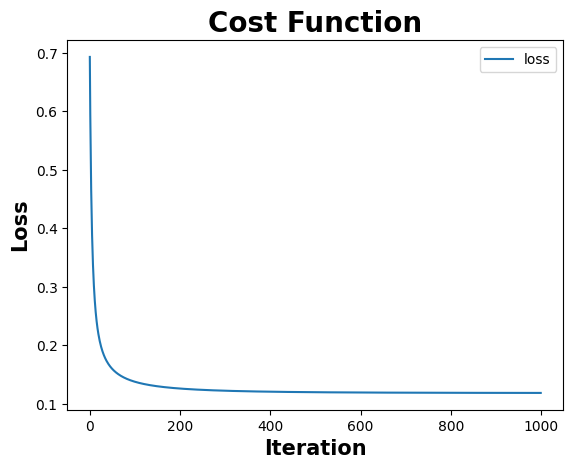

TN, FP, FN, TP: 81578 772 3064 5171
Accuracy = 0.9576530330628691
F1 = 0.7294399774298208
F0.5 = 0.807792045490049
F2 = 0.6649435485945014
Gmean = 0.7886970061373189
Balanced Accu. = 0.8092774741955069
Accuracy = 0.9595
F1 = 0.7227926078028748
F0.5 = 0.8014571948998179
F2 = 0.6581899775617053
Gmean = 0.784564691445314
Balanced Accu. = 0.8060527161684345
82350 7650 90000
################################################## 10th CV ##################################################
82350 8235 90585


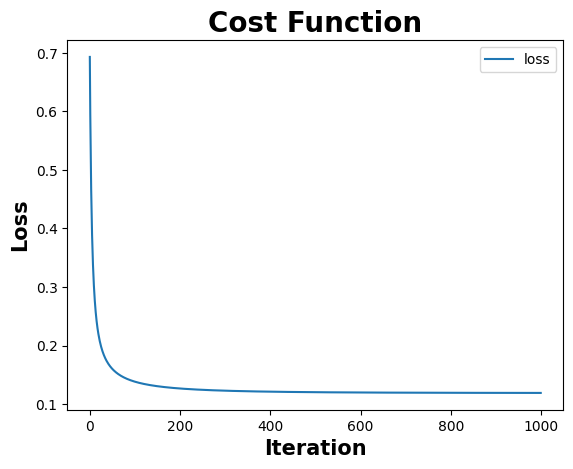

TN, FP, FN, TP: 81591 759 3059 5176
Accuracy = 0.9578517414582989
F1 = 0.7305575158786168
F0.5 = 0.8093823299452697
F2 = 0.6657234726688103
Gmean = 0.7891410917262993
Balanced Accu. = 0.8096599878567092
Accuracy = 0.9601
F1 = 0.7313131313131314
F0.5 = 0.8008849557522124
F2 = 0.6728624535315985
Gmean = 0.795236056607132
Balanced Accu. = 0.8143844423015107


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.959950,0.957759,0,0,0,0,0,0
F1,0,0,0.727226,0.729922,0,0,0,0,0,0
F.5,0,0,0.803294,0.808775,0,0,0,0,0,0
F2,0,0,0.664392,0.665079,0,0,0,0,0,0
Gmean,0,0,0.788897,0.788721,0,0,0,0,0,0
B_Acc,0,0,0.809500,0.809319,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = diab_df.iloc[:, :-1]
y = diab_df.iloc[:, -1]


for train_index, test_index in skf.split(diab_df, diab_df['diabetes']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = over.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)

###################### BCE (with Sigmoid) ##############################
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.5
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)

    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))

    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))


res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])


res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
D4_01 = res
D4_01

82350 7650 90000
################################################## 1th CV ##################################################
76500 7650 84150


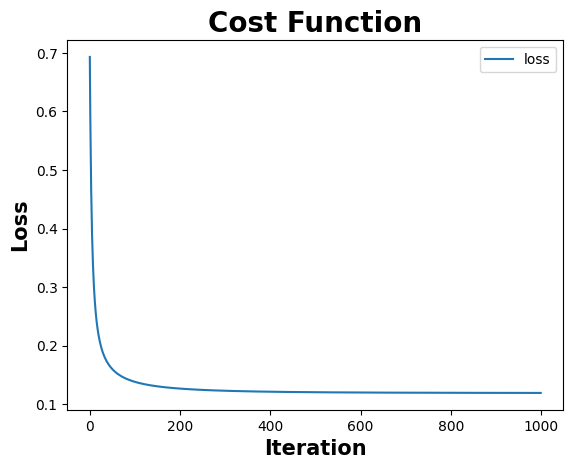

TN, FP, FN, TP: 75807 693 2848 4802
Accuracy = 0.9579203802733215
F1 = 0.7306200076074553
F0.5 = 0.8103273709078637
F2 = 0.6651890843607148
Gmean = 0.788686301564854
Balanced Accu. = 0.8093267973856209
Accuracy = 0.9595
F1 = 0.7239263803680982
F0.5 = 0.8001808318264015
F2 = 0.6609410007468259
Gmean = 0.7866602378393691
Balanced Accu. = 0.807653487624558
82350 7650 90000
################################################## 2th CV ##################################################
76500 7650 84150


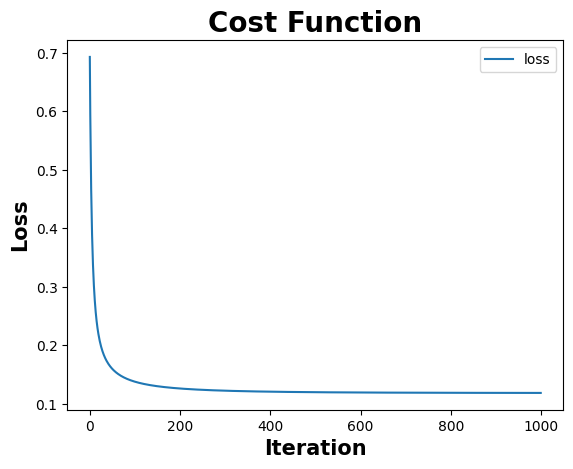

TN, FP, FN, TP: 75805 695 2836 4814
Accuracy = 0.9580392156862745
F1 = 0.7316665400106391
F0.5 = 0.8108199151115004
F2 = 0.6665928161954083
Gmean = 0.789660717027079
Balanced Accu. = 0.8100980392156862
Accuracy = 0.9585
F1 = 0.7205387205387206
F0.5 = 0.7890855457227138
F2 = 0.6629491945477075
Gmean = 0.7890075713231601
Balanced Accu. = 0.8092414014786242
82350 7650 90000
################################################## 3th CV ##################################################
76500 7650 84150


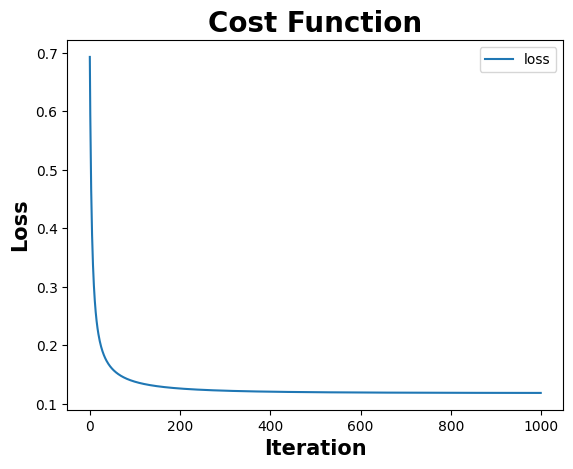

TN, FP, FN, TP: 75796 704 2832 4818
Accuracy = 0.9579797979797979
F1 = 0.7315517764955968
F0.5 = 0.8100746519604547
F2 = 0.6669065943192515
Gmean = 0.7899418199741016
Balanced Accu. = 0.8103006535947712
Accuracy = 0.9588
F1 = 0.7158620689655173
F0.5 = 0.7984615384615384
F2 = 0.64875
Gmean = 0.7779351052403307
Balanced Accu. = 0.8008678881388621
82350 7650 90000
################################################## 4th CV ##################################################
76500 7650 84150


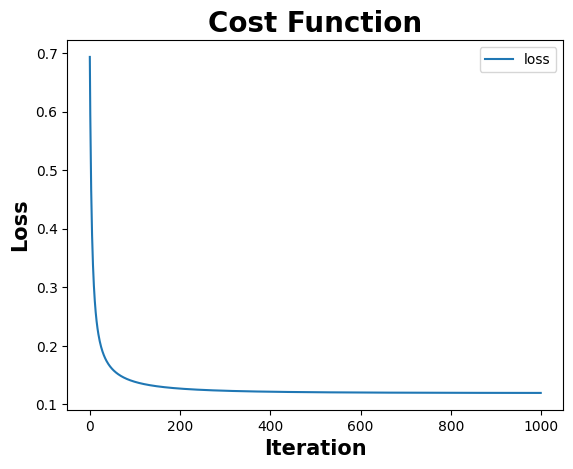

TN, FP, FN, TP: 75776 724 2853 4797
Accuracy = 0.9574925727866904
F1 = 0.7284184951788019
F0.5 = 0.8066523172126185
F2 = 0.6640181611804766
Gmean = 0.7881143990793087
Balanced Accu. = 0.808797385620915
Accuracy = 0.9621
F1 = 0.7398764584763212
F0.5 = 0.8221476510067114
F2 = 0.672572997254804
Gmean = 0.7933505396436134
Balanced Accu. = 0.8133429765348763
82350 7650 90000
################################################## 5th CV ##################################################
76500 7650 84150


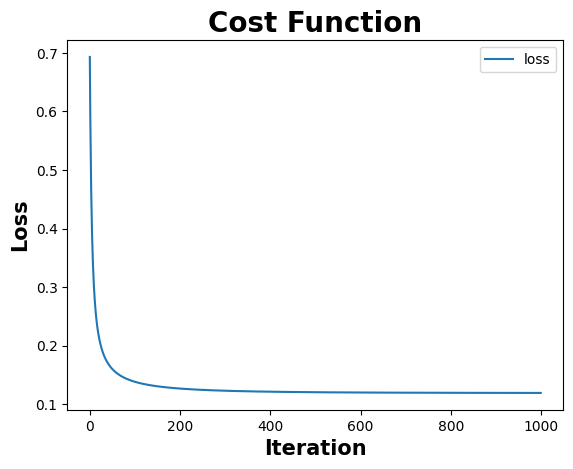

TN, FP, FN, TP: 75799 701 2837 4813
Accuracy = 0.9579560308972074
F1 = 0.7312367061683379
F0.5 = 0.8101057025516731
F2 = 0.6663620756493327
Gmean = 0.7895474472856138
Balanced Accu. = 0.8099934640522876
Accuracy = 0.9582
F1 = 0.7133058984910837
F0.5 = 0.7921998781230957
F2 = 0.6487025948103792
Gmean = 0.7783836246870631
Balanced Accu. = 0.8010736097717777
82350 7650 90000
################################################## 6th CV ##################################################
76500 7650 84150


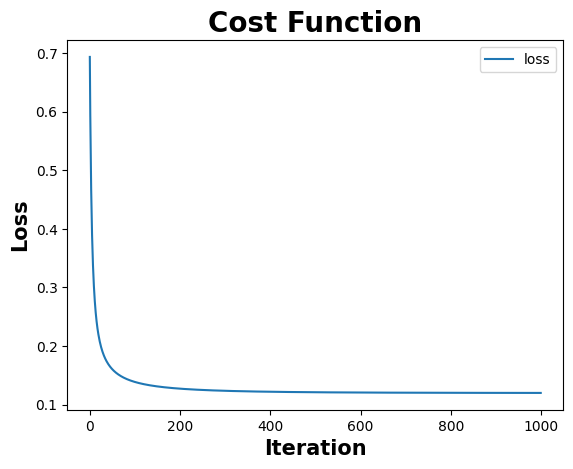

TN, FP, FN, TP: 75797 703 2870 4780
Accuracy = 0.9575401069518716
F1 = 0.7279372572907942
F0.5 = 0.8079237374078833
F2 = 0.6623617770141064
Gmean = 0.786825672442207
Balanced Accu. = 0.8078235294117647
Accuracy = 0.9615
F1 = 0.7441860465116279
F0.5 = 0.8069164265129684
F2 = 0.6905055487053021
Gmean = 0.8074548192421206
Balanced Accu. = 0.8242205078752813
82350 7650 90000
################################################## 7th CV ##################################################
76500 7650 84150


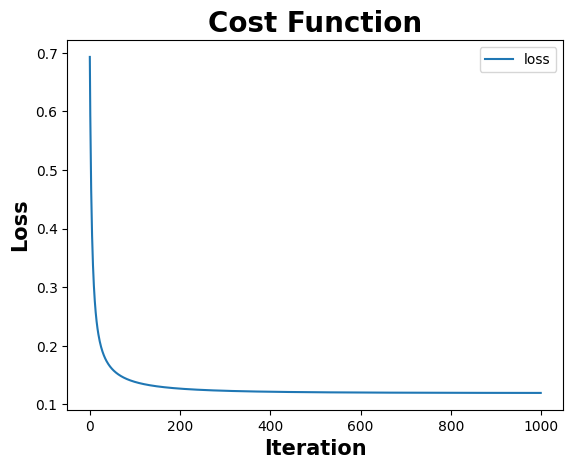

TN, FP, FN, TP: 75782 718 2855 4795
Accuracy = 0.9575401069518716
F1 = 0.7285573197599331
F0.5 = 0.8071847013669113
F2 = 0.6638883504555146
Gmean = 0.7879812833874569
Balanced Accu. = 0.8087058823529412
Accuracy = 0.9623
F1 = 0.7405368203716449
F0.5 = 0.8246474555487431
F2 = 0.6719960029977516
Gmean = 0.7927451501152055
Balanced Accu. = 0.8129186756669882
82350 7650 90000
################################################## 8th CV ##################################################
76500 7650 84150


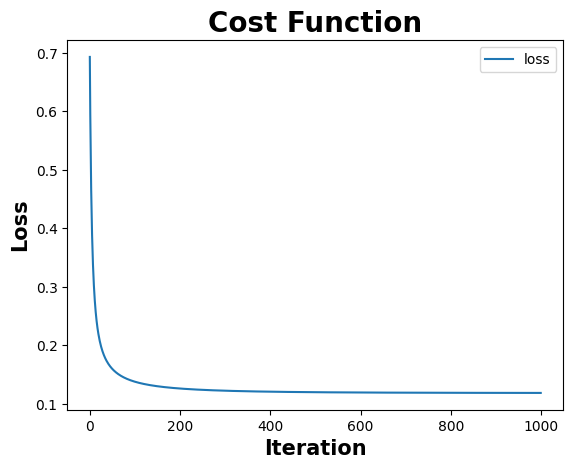

TN, FP, FN, TP: 75794 706 2830 4820
Accuracy = 0.9579797979797979
F1 = 0.7316332726168792
F0.5 = 0.8099751293943671
F2 = 0.6671095609810109
Gmean = 0.7900953351610531
Balanced Accu. = 0.8104183006535948
Accuracy = 0.9591
F1 = 0.7204374572795625
F0.5 = 0.7980012113870382
F2 = 0.6566159980064789
Gmean = 0.7836916980520008
Balanced Accu. = 0.8053005464480874
82350 7650 90000
################################################## 9th CV ##################################################
76500 7650 84150


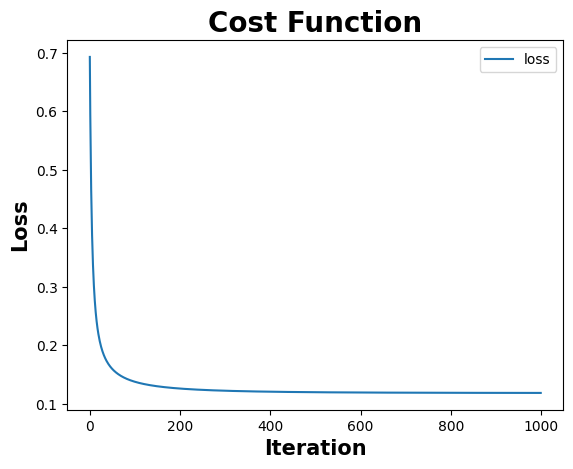

TN, FP, FN, TP: 75783 717 2836 4814
Accuracy = 0.9577777777777777
F1 = 0.7304453379864957
F0.5 = 0.8084234567071942
F2 = 0.6661869308903712
Gmean = 0.7895461217074128
Balanced Accu. = 0.8099542483660132
Accuracy = 0.9596
F1 = 0.7232876712328767
F0.5 = 0.8024316109422492
F2 = 0.6583541147132169
Gmean = 0.78460795509703
Balanced Accu. = 0.8061073609771778
82350 7650 90000
################################################## 10th CV ##################################################
76500 7650 84150


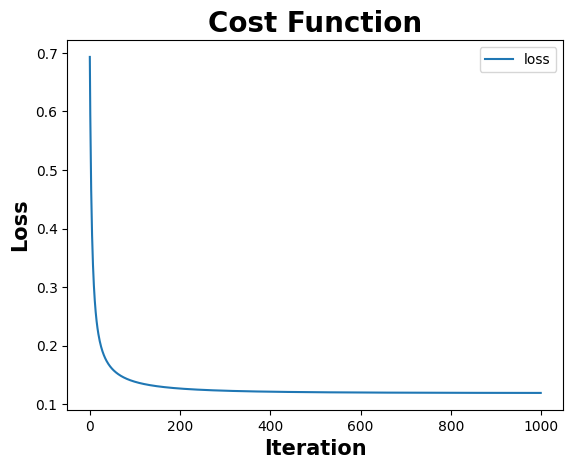

TN, FP, FN, TP: 75797 703 2851 4799
Accuracy = 0.9577658942364825
F1 = 0.7297749391727494
F0.5 = 0.8090565783262527
F2 = 0.664644618026702
Gmean = 0.788387896434594
Balanced Accu. = 0.8090653594771242
Accuracy = 0.96
F1 = 0.7297297297297297
F0.5 = 0.8011869436201781
F2 = 0.6699751861042184
Gmean = 0.7931237753637522
Balanced Accu. = 0.8127290260366442


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.959960,0.957799,0,0,0,0,0,0
F1,0,0,0.727169,0.730184,0,0,0,0,0,0
F.5,0,0,0.803526,0.809054,0,0,0,0,0,0
F2,0,0,0.664136,0.665326,0,0,0,0,0,0
Gmean,0,0,0.788696,0.788879,0,0,0,0,0,0
B_Acc,0,0,0.809346,0.809448,0,0,0,0,0,0


In [15]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = diab_df.iloc[:, :-1]
y = diab_df.iloc[:, -1]


for train_index, test_index in skf.split(diab_df, diab_df['diabetes']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = under.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)

#BCE (with Sigmoid)
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.5
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)

    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))

    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))

    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))

    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))


res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])


res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
D4_U_01 = res
D4_U_01